# Prelab Experiment 02

This notebook help you gain more familiarity with doing some calculations and performing fits in Python while also reviewing some concepts for the upcoming experiment with RC circuit transient signals. Parts of this notebook pair with the Canvas quiz. You will also need to upload the notebook saved as a .html file.

## Calculate an RC time constant

Using the component values given in your Canvas quiz, calculate the expected decay constant, $\tau$ for an RC circuit. You will need to write the expressions in the code block below for both the RC time constant, and it's uncertainty. 

Some basic math functions in python you might need or encounter:
* multiplication is done with an asterisk ``*``
* division is done with the slash ``/``
* addition and subtraction are ``+`` and ``-``
* exponentiation is done with a double asterisk ``**`` (e.g. $3^2$ is coded as ``3**2``)
* a square root function exists within the ``numpy`` package as ``np.sqrt()``
* an absolute value exists within the ``numpy`` package as ``np.abs``

More ``numpy`` functions can be found on the Numpy cheat sheet on canvas. Although you won't need it this week, many of these functions also work with arrays as well as scalars.

You can add your code to do your RC time constant and uncertainty calculation in the cell below or in an additional code cell (or more). Just make sure you run the line to import numpy as np before using the numpy functions.

Being able to do quick calculations within your Jupyter notebook will be very handy in the lab!

In [1]:
from common import *

Make sure to report the result with an apporpriate number of significant figures based on the uncertainty. You can either do this by transcribing the result into a markdown cell, or by using a format statement when you print the result.

The numbers we work with most of the time are called "floats" or floating-point numbers; these are a way of storing values with decimals that consists of an integer (the significand) and an exponent to place the decimal correctly. The computer stores as many places as it can for the number type (floats in Python are 64-bit double-precision values), but when they are printed they are technically converted to a string first. So, we can specify how we want that string printed.

When we input a `print` command we can add a format string to tell python what to give back so that it looks like `print(f:{mybignumber:specifier}")`. Different format strings do different things:
* if we just care about the number of places after the decimal we can use a `.nf` specifier where n is the number of places after the decimal
* if we just care about the number of significant digits (counting before and after the decimal) use `.ng` where n is the nubmer of significant digits (for example, we always want uncertainty to 1 sig fig!)
* if we want to specify both the leading and trailing digits we can specify a fixed-width with `m.nf` where m is the nubmer of spaces/digits including the decimal, and n specifies the precision as above.

In [2]:
x=289.254
y=42
z=x/y

print(z) # full float
print(f"{z:.4f}") # 4 decimal places
print(f"{z:.1g}") # 1 significant digit
print(f"{x:5.0f}") # 5 places total (including the decimal) and 0 places after

6.8870000000000005
6.8870
7
  289


## Pack and trim the data

Instructions:

Last week you used a code block to reduce the number of data points as well as estimate the uncertainties. You will use the same routine again, but now because you are only interested in fitting an exponential decay (not a series of charging and discharge cycles) you will need to isolate the region of interest. We will do this by "trimming" the data down to just the part we are interested in.

You will need to load in the sample data and determine what region you want to use for fitting an exponential decay model (below).

Below, we have provided a more compact version of the code you used last week to examine your data and then do some averaging to pack it. Once you have saved a set of data from the oscilloscope, and uploaded it to your Jupyter account, the entire code runs in one cell. You will probably need to run it several times until you are satisfied with the final output. The key pieces of code that you will need to alter include:
- the name for your uploaded raw data file `fname`
- the zoomed in flat range you use to examine the noise and measure the standard deviation `indexraw_min` to `indexraw_max`
- the corresponding y-range for the selected region to examine `yregion_min` to `yregion_max`
- the number of points you want to average when packing the data `npac`
- to trim unwanted data set the flag `trim` to `1`, and enter `trim_min` and `trim_max` limits of the PACKED indices to include this data only; note if `trim` is set to `0` the full data set will be packed and saved
- the filename you will use to save your packed and trimmed data `output_name`

In [3]:
gopts = VOLTAGE_VERSUS_TIME_GRAPH_OPTIONS

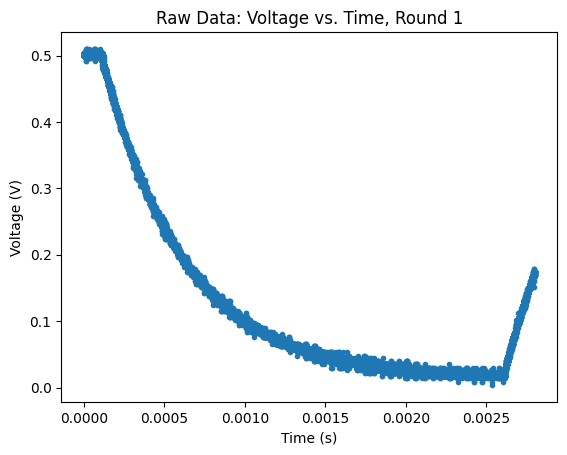

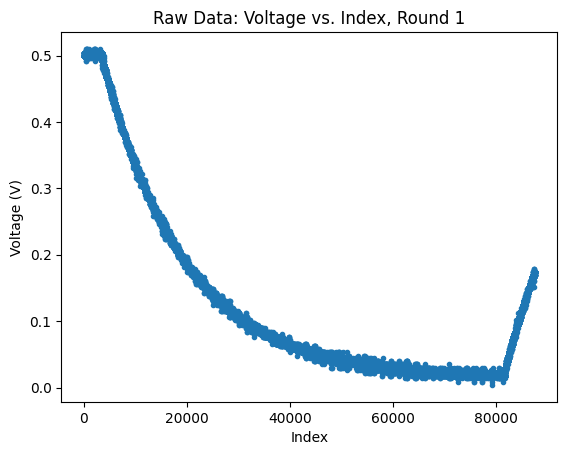

In [4]:
raw = load_raw_data('RCdecayVC3.csv', plot=True, graphing_options=gopts)

Mean =  0.022195999999999997 0.0016203653908918197
Standard Deviation (Noise Value) =  0.0016203653908918197


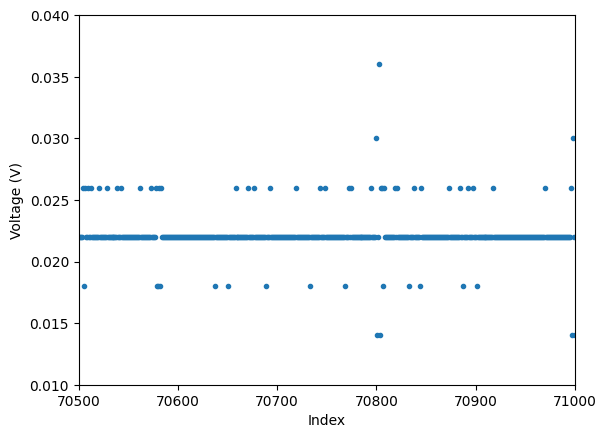

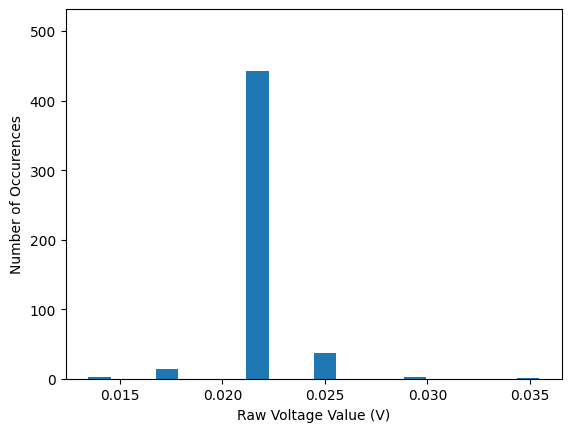

In [5]:
noise = isolate_noise(raw, indices_range=(70500,71000), y_range=(0.01,0.04),
                      plot=True, graphing_options=gopts)

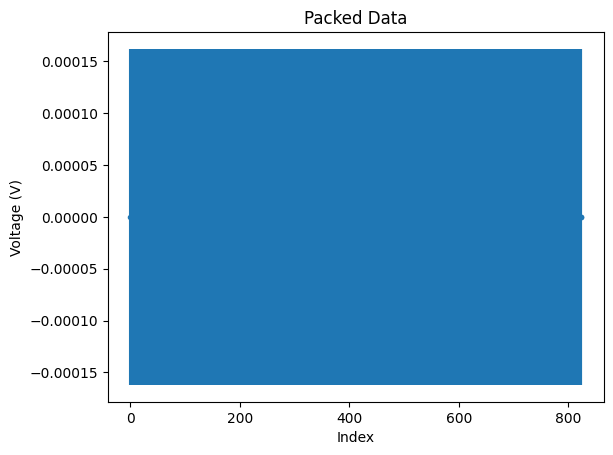

In [29]:
packed = pack_data(raw, p=100, noise=noise,
                   trim_range=(0,50),
                   plot=True, graphing_options=gopts)

## Fit an exponential to sample data

Instructions:

Using the standardized code block for fitting included below, change the fit function to an exponential and adjust the initial guesses (hint: you have calculated an RC time constant above with values consistent with the ones used for this data).

Fitting:

The following code block is identical to the Fitting-general-2024-v0.2 notebook which you can add to your notebook by copying and pasting, or by running and saving/copying the results into your active notebook (better to show all work though!). Note that if you want to save multiple fit outputs and import them, you will need to change the output image filename at the bottom of the cell!

In addition to defining new fitting functions ("DEFINED FITTING FUNCTIONS"), you will typically need to update or modify the information contained in "LIST OF ALL INPUTS":
* `fname` to load the correct data file
* `x_name`, `x_units`, `y_name` and `y_units` to match your data file
* `fit_function = ..` to use your defined fitting function
* `param_names` and `guesses`: these MUST match the parameters in the defined fitting function that follow after (x,...)
* Update any of the optional features flags as desired

The datafile ``fname`` is assumed to be a four-column .csv file corresponding to x-values, x-uncertainties, y-values, y-uncertainties, with 2 header rows giving the names and units of these columns. This is the same as the output of the packed data we used last week and will continue to use.

In [7]:
guesses=ExponentialFitParameters(
    amplitude=1,
    tau=900,
    offset=0.1
)

results = autofit(packed, gopts, FitType.EXPONENTIAL, guesses)

/home/moofy/Programming/physics-219/Experiment02/common.py:294: OptimizeWarning: Covariance of the parameters could not be estimated
  fit_params, fit_cov = curve_fit(


In [8]:
print(results.chi2)

77558.59896831516


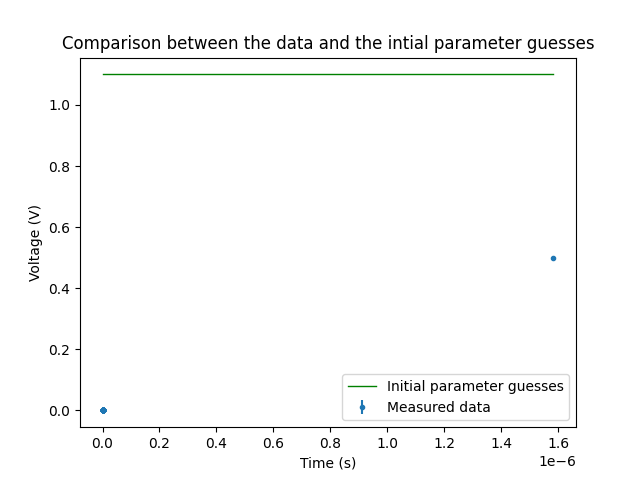

In [9]:
display(results.initial_guess_graph)

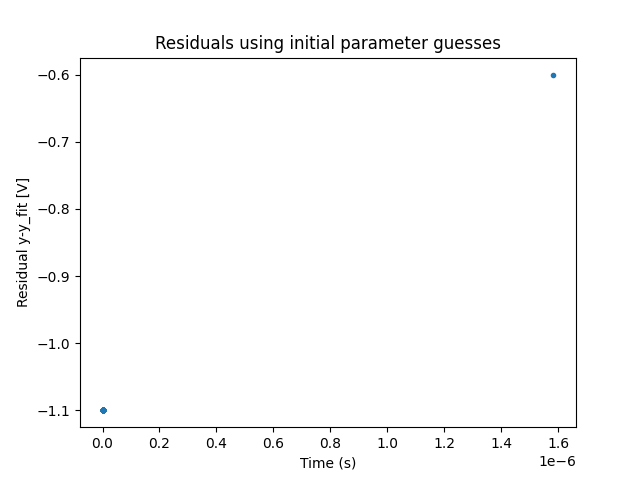

In [10]:
display(results.initial_guess_residuals_graph)

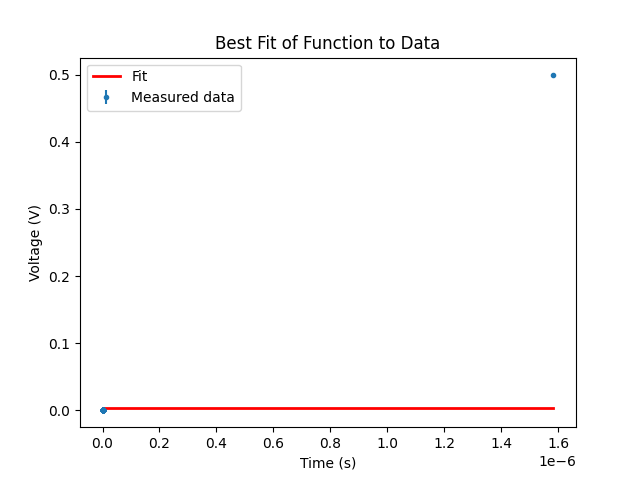

In [11]:
display(results.autofit_graph)

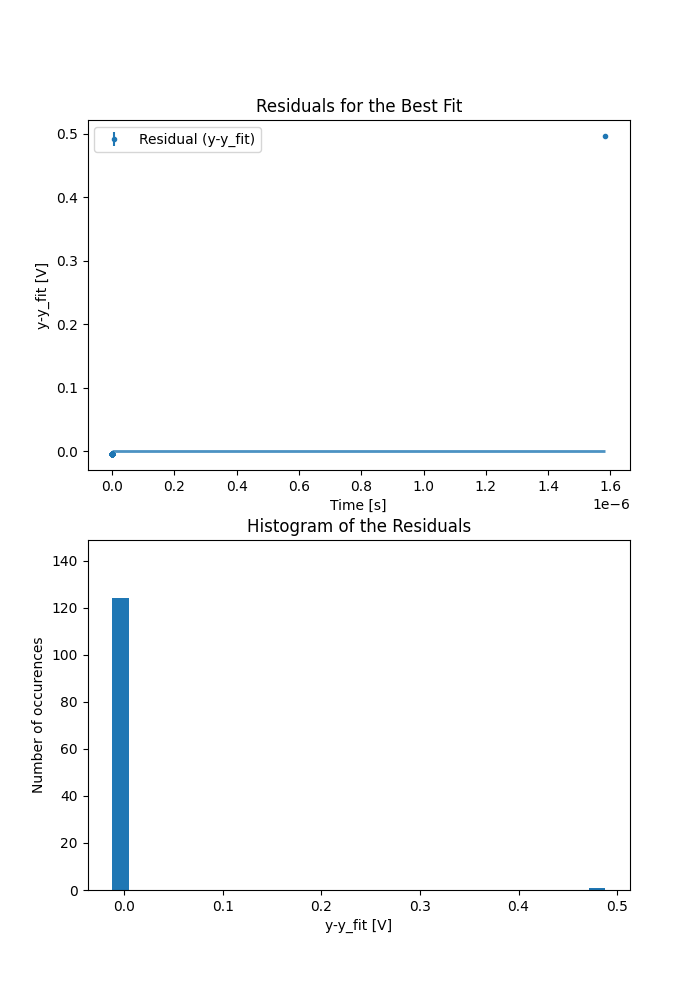

In [12]:
display(results.autofit_residuals_graph)